# Some fundamental concepts of wave propagation

## Introduction
This notebook describes some fundamental concepts regarding representation of functions as Fourier series and Fourier integrals and its application to wave propagation analysis. It uses some of the functions availabl in the set of subroutines stored in the Github repository Py_Series. The notebook is by no means intended to be a thorough treatment of Fourier analysis but its main purpose is to show some of the fundamental mathematical concepts implemented in easy-to-use python subroutines. The notebook starts with the description of periodic function and its representation in terms of a Fourier series. The possibility of representing a periodic function by a summation of independent harmonics in the form of a Fourier series is then extended to the case of Fourier integrals where a non-periodic function is now assumed periodic but with an infinite period. Such a representation of non-periodic functions opens up the possibility of describing functions in two alternative, but related domains, e.g., the time-frequency domain. The time-frequency representation of functions is then applied to the representation of plane waves where the Fourier representation is used to transform both space and time into wavenumber and frequency respectively.

In [31]:
%matplotlib notebook
from __future__ import division
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import fourier as fou
from sympy import *
from sympy import init_printing
init_printing()
from IPython.display import Image
from IPython.display import HTML

In [32]:
def harmonic(n , x , sn , nfig): 
    an = 8.0/(np.pi*(2*n-1))
    sn[:] = an*np.sin((2.0*n-1.0)*x[:])
    plt.figure(nfig)
    plt.plot(x , sn)
    
    return sn

## Periodic Functions

A function $f(x)$ is said to be periodic of period $T$ if there is a constant $T$ such:

$$f(x + T) = f(x).$$


A periodic function $f(x)$ of period $T = 2 \ell $ can be represented as a Fourier series, denoted here as $F{S_{f(x)}}$, and of the general form:

$$F{S_{f(x)}}(x) = {a_0} + \sum\limits_{n = 1}^\infty  {\left( {{a_n}{C_{\frac{{n\pi x}}{\ell }}} + {b_n}{S_{\frac{{n\pi x}}{\ell }}}} \right)} $$

where the coefficients $a_0$ , $a_n$ and $b_n$ are defined by:


$${a_0} = \frac{1}{{2\ell }}\int\limits_{ - \ell }^{ + \ell } {f(x)dx}$$

$${a_n} = \frac{1}{\ell }\int\limits_{ - \ell }^{ + \ell } {f(x){C_{\frac{{n\pi x}}{\ell }}}dx}$$

$${b_n} = \frac{1}{\ell }\int\limits_{ - \ell }^{ + \ell } {f(x){S_{\frac{{n\pi x}}{\ell }}}dx.} $$

In the expressions above and the rest of this document we use ${C_\theta } = \cos \theta$ and ${S_\theta } = \sin \theta. $ It is now evident that representing a periodic function by its Fourier series amounts to finding its conforming coefficients ${a_n}$ and ${b_n}.$


### A perfect harmonic

Accordingly, a periodic function $f(x)$ ends up being described by the sum of harmonics of the type ${a_n}{C_{\frac{{n\pi x}}{\ell }}}$ and ${b_n}{S_{\frac{{n\pi x}}{\ell }}}.$ For instance, consider the following harmonic:

$$f(t) = A{C_{\omega t}}$$

where $\omega  = 2\pi f$ and plotted below.

<IPython.core.display.Javascript object>


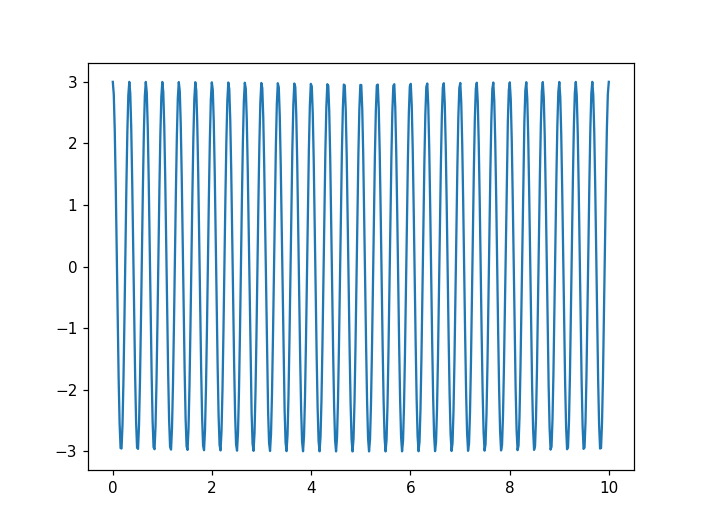

In [33]:
N = 512
T_t = 10.0
dt = T_t/N
f = 3.0
A = 3.0
omega = f*2.0*np.pi
res = np.zeros(N, dtype = float )

lif = 0
lff = dt*N
time = np.linspace(lif, lff, N , dtype=float)
res[:] = A*np.cos(omega*time[:])
plt.figure(0)
plt.plot(time , res)

Since each harmonic contributes with a different frequency and different amplitude it is convenient to describe the contribution from each independent term in the series. This amplitude versus frequency plot is known as the amplitude spectra. The next plot shows the frequency spectra for the perfect harmonic recently described:

<IPython.core.display.Javascript object>


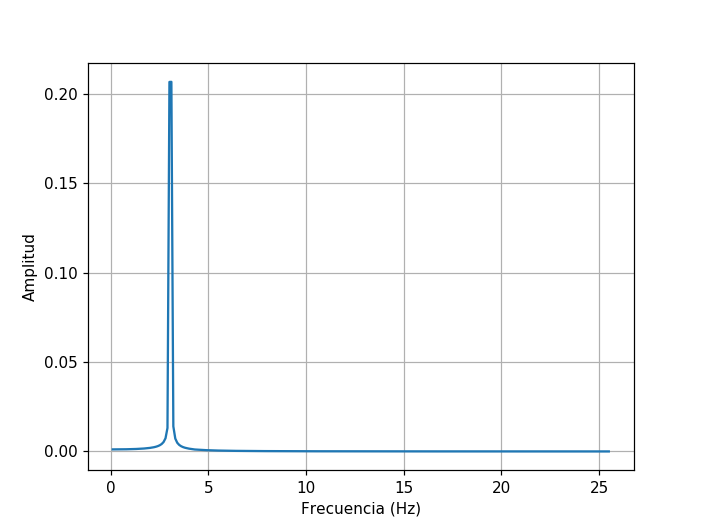

In [34]:
FS = 15.0
x , Samag , A , Nf = fou.Ftrans(res*dt , N , T_t/N , FS)
fou.grafFourier(Samag*dt , x , Nf , 1)

### Square wave

To clarify consider the following square wave which is periodic with period $T = \pi$

<center><img src="./img/sq_wave.png" alt="square wave" style="width:500px"></center>


and admitting the following Fourier series representation:

$$F{S_{f(x)}} = 2 + \frac{8}{{\pi (2n - 1)}}\sum\limits_{n = 1}^\infty  {{S_{(2n - 1)x}}}. $$

Each term in the function corresponds to a harmonic of a given frequency and amplitude. Let us consider the independent harmonics one step at a time. The next set of plots shows harmonics of increasing frequency.

In [35]:
x = np.arange(-5.0 , 5.0 , 0.05)
n = len(x)
sum = np.zeros(n)
sn  = np.zeros(n)

The first term in the series correspond to the constant coefficient $a_0$

<IPython.core.display.Javascript object>


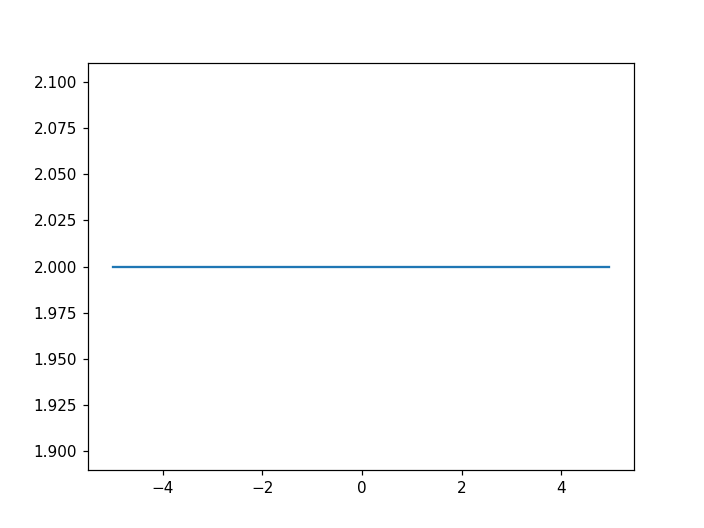

In [36]:
# S0
sum[:] = 2.0
plt.figure(3)
plt.plot(x , sum)

Consider now the terms for $n=1$  and up to $ n = 4$

<IPython.core.display.Javascript object>


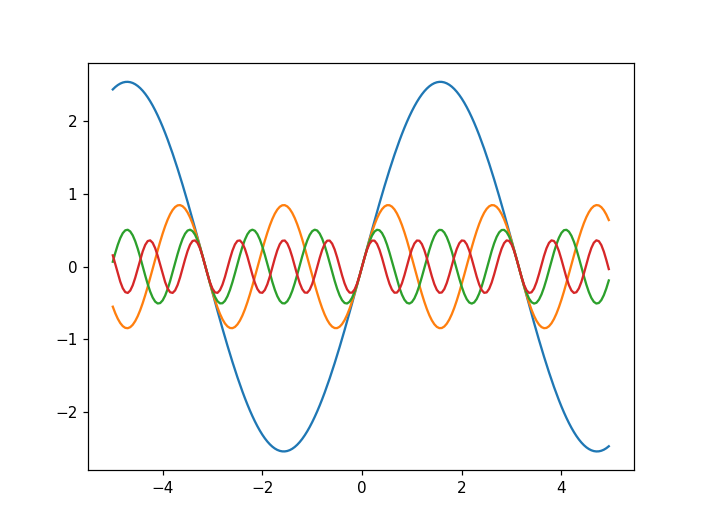

In [37]:
for i in range(1, 5):
    sn = harmonic(i , x , sn , 2)
    sum[:] = sum[:] + sn[:]
    sn[:] = 0.0

The function resulting from the partial summation of independent harmonics is shown next. Each independent harmominc contributes with different amplitude and frequency.

<IPython.core.display.Javascript object>


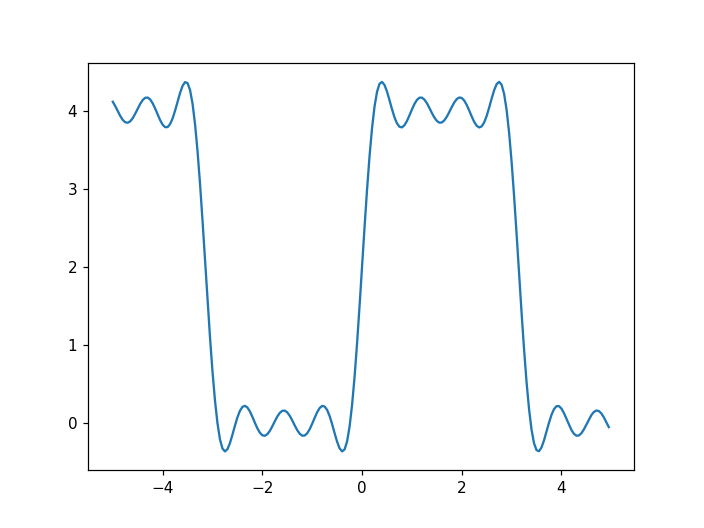

In [38]:
plt.figure(4)
plt.plot(x , sum)
N = len(sum)
FS = 15.0
T_t=10.0

The Fourier amplitude spectra of the resulting function is shown next:

<IPython.core.display.Javascript object>


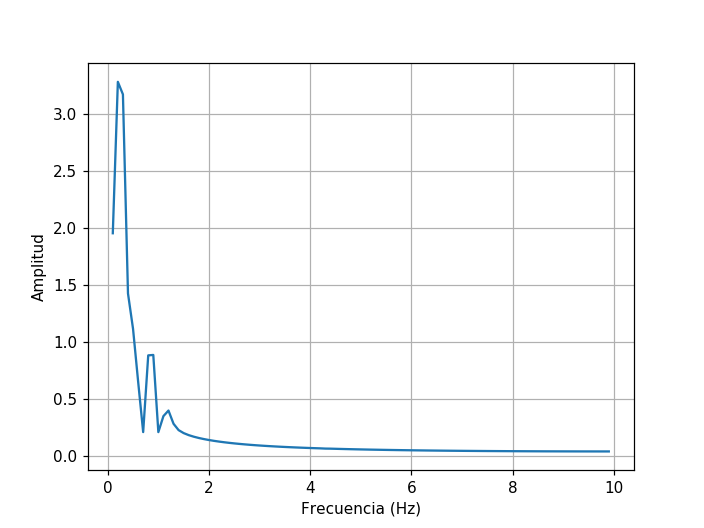

In [39]:
x , Samag , A , Nf = fou.Ftrans(sum , N , T_t/N , FS)
fou.grafFourier(Samag*dt , x , Nf , 5)
plt.show()

### Complex Valued Fourier Series
Substituting the sine and cosine terms in the Fourier series representation discussed above by its corresponding representations in terms of the well-known Euler formulas:

$${C_\theta } = \frac{{{e^{i\theta }} + {e^{ - i\theta }}}}{2}$$

$${S_\theta } = \frac{{{e^{i\theta }} - {e^{ - i\theta }}}}{2i}$$

we have the alternative representation of $f(x)$:

$$F{S_{f(x)}}(x) = \sum\limits_{n =  - \infty }^\infty  {{c_n}} {e^{\frac{{in\pi x}}{\ell }}}$$

$${c_n} = \frac{1}{{2\ell }}\int\limits_{ - \ell }^{ + \ell } {f(x){e^{ - \frac{{in\pi x}}{\ell }}}dx}$$

in which the $c_n$ terms and the exponentials are complex functions; although the resulting series  is real.

## Non periodic functions- The Fourier integral

A non-periodic function $f(x)$ can still be represented by a Fourier series if it is assumed periodic with an infinite period in which case the Fourier series representation becomes a continous integral representation:

$$f(x) = \frac{1}{{2\pi }}\int\limits_{ - \infty }^{ + \infty } {F(\omega ){e^{  i\omega x}}d\omega }$$

where:

$$F(\omega ) = \int\limits_{ - \infty }^{ + \infty } {f(x){e^{ - i\omega x}}dx}$$

The above pair of integrals allows one to express functions back and forth in the space (time) and frequency domain. The frequency domain representation $F(\omega)$ of the function $f(x)$ is its Fourier tansform, while the representation of the spatial function $f(x)$ in terms of frequency domain functions $F(\omega)$ is its inverse Fouier transform.


## Analytic transform

To show the alternative space-frequency domain representation of functions as described by the Fourier transform pair consider the following function:

$$f(t) = 4.0{e^{ - \left| t \right|}} - 5.0{e^{ - 3\left| {t + 2} \right|}}$$

<IPython.core.display.Javascript object>


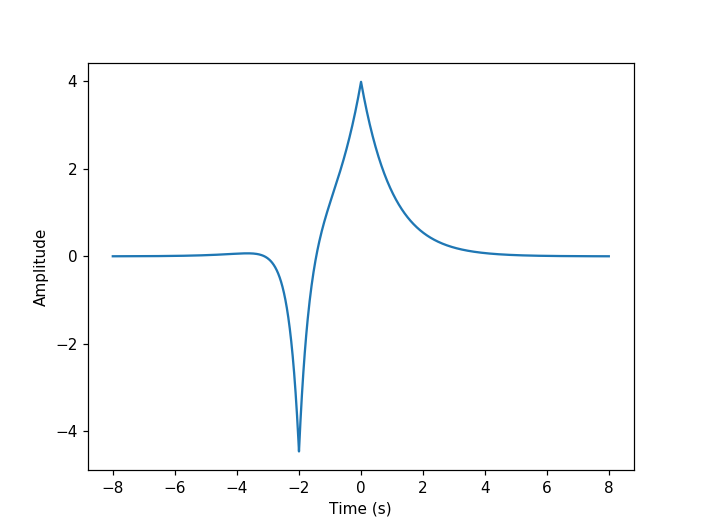

In [10]:
N   = 1024
T_t = 16.0
x = np.arange(-T_t/2.0 , T_t/2.0 ,T_t/N)
n = len(x)
FX = np.zeros((n), dtype = complex)

FX = 4.0*np.exp(-abs(x))-5.0*np.exp(-3.0*abs(x+2.0))
plt.figure(6)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(x , FX)
plt.show()

with transform given by:

$$F(\omega ) = \frac{8}{{{\omega ^2} + 1}} - \frac{{30{e^{2\hat i\omega }}}}{{{\omega ^2} + 9}}$$

and the following amplitude spectra

<IPython.core.display.Javascript object>


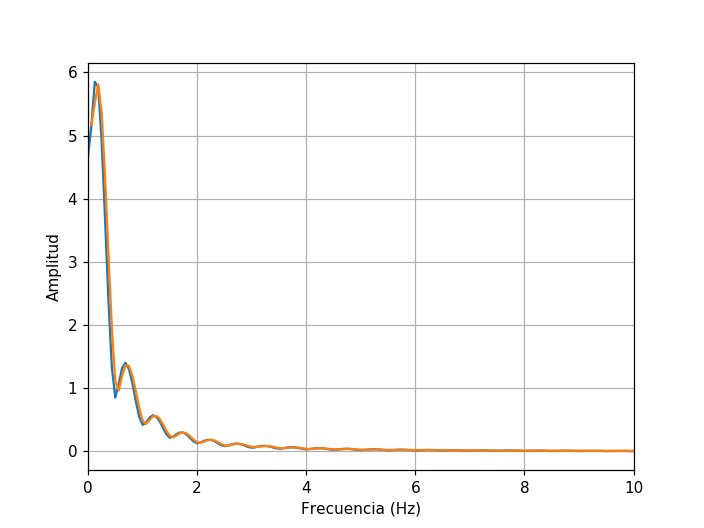

In [11]:
omega = np.arange(0.0 , np.pi*N/T_t , 2.0*np.pi/T_t)
nw = len(omega)
Fw = np.zeros((nw), dtype = complex)
t1 = np.zeros(nw)
t2 = np.zeros(nw)

t1 = 8.0/(omega**2+1.0)
t2 = (30.0/(omega**2+9.0))*np.exp(2*omega*1j)
Fw = t1-t2
plt.figure(7)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0.0 , 10.0)
plt.plot(omega/(2.0*np.pi) , np.abs(Fw))
plt.show()
# We can compute it numerically also
FS = 15.0
x , Samag , A , nfs = fou.Ftrans(FX*T_t/N , N , T_t/N , FS)
fou.grafFourier(Samag , x , nfs , 7)

## Fourier transform with the FFT() algorithm

In most of the problems of interest in engineering (and physics) the involved functions are not available in closed form and the Fourier transform must be computed numerically. This can be achieved efficiently via the Fast Fourier Transform algorithm, see Cooley and Tukey (1965). In this section we show some details about the computation of the Fourier transform using python and particularly the FFT algorithm. The transform itself is coded into subroutine Ftrans() availbale in this REPO. To show its use we introduce a Ricker pulse, which is a simple function widely used in wave propagation analysis.

Consider the discrete version of a function, or more general, a time series. Assume the function to be of maximum frequnency $f_{max}$. The sampling theorem mandates that the associated time series must be sampled at least at a rate

$$\delta = \frac{1}{2f_{max}}$$

in order to capture this maximum frequency.

Consider then the case of a signal of total duration $T$ sampled by $N$ points. In the FFT algorithm this time series is stored in memory as shown in the top part of the figure belows. Similarly, the corresponding frequency representation of the function is stored as shown in the bottom part of the figure.

<center><img src="./img/esquema.png" alt="esquema.png" style="width:300px"></center>

After selecting the number of data points $N$, the resulting effective sampling rate turns out to be:

$$\Delta t = \frac{T}{N}$$

allowing to effectivly describe frquencies up to:


$$f = \frac{1}{{2\Delta t}}$$

sampled at:

$$df = \frac{1}{{N} \Delta t}.$$

In the following section we apply these ideas to the numerical treatment of a specific signal.

## Example: The Ricker Wavelet

The Ricker wavelet is a time signal defined by simple parameters thus allowing to produce time series with a perfectly known and therefore easy-to-manipulate spectra.

The time signal corresponding to the Ricker wavelet is defined by the following function:

$$f(t) = \left[ {1 - 2{\pi ^2}f_c^2{{(t - {t_c})}^2}} \right]{e^{ - {\pi ^2}f_c^2{{(t - {t_c})}^2}}}$$


where $f_c$ is the dominant peak frequency and $t_c$ defines the time location of the center peak in the tinme domain. Notice that the actual frequency content of the pulse is defined by its time-domain "size" or breadth denoted by $t_b$ and given by:


$${t_b} = \frac{{\sqrt 6 }}{{\pi {f_c}}}.$$




<center><img src="./img/pulso.png" alt="pulso.png" style="width:400px"></center>

### Design of the Ricker pulse

To design a particular pulse we need to select values of the parameters defining its breadth $t_b$ (or frequency content $f_c$) and its location within a possible longer signal of duration $T_t$ required for analysis purposes.  

The pulse perse has a duration (or breath) defined by its central frequency according to:

$${t_b} = \frac{{\sqrt 6 }}{{\pi {f_c}}}$$

To correctly compute the pulse numerically we need to define the total number of time samples $N$ making sure that we keep at last the minimum required sampling rate as specified by $f_c$.

Thus, in the design of the pulse we select:
(i) the total duration of the signal $T_t$
(ii) the total number of data points $N$ (usually a power of 2)
(iii) the time location of the central peak of the pulse $t_c$
(iv) the central frequency of the pulse $f_c$.

Consider for instance the set of parameters defined in the python code below where we use the function ricker() to compute the corresponding pulse:


Breadth = 0.194924200308 s


<IPython.core.display.Javascript object>


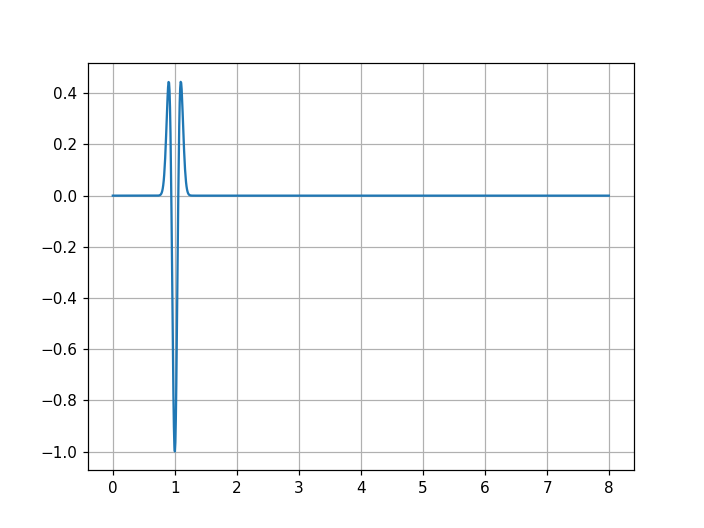

In [12]:
N = 1024
T_t = 8.0
tc = 1.0
fc = 4.0
t_b = np.sqrt(6)/np.pi/fc
print ("Breadth =") , t_b , ('s')
Rick , time = fou.ricker(N , T_t , tc, fc)
fou.grafsignalG(Rick , T_t/N , 9)

Notice the amplitude spectra can be reproduced up to:

In [13]:
print ('Effctive maximum frquency =') , N/2.0/T_t
print ('Effective time step=') , T_t/N

Effctive maximum frquency = 64.0
Effective time step= 0.0078125


Now, conducting direct fourier transform of the above time signal we obtain the corresponding Fourier amplitude spectra spectra:

<IPython.core.display.Javascript object>


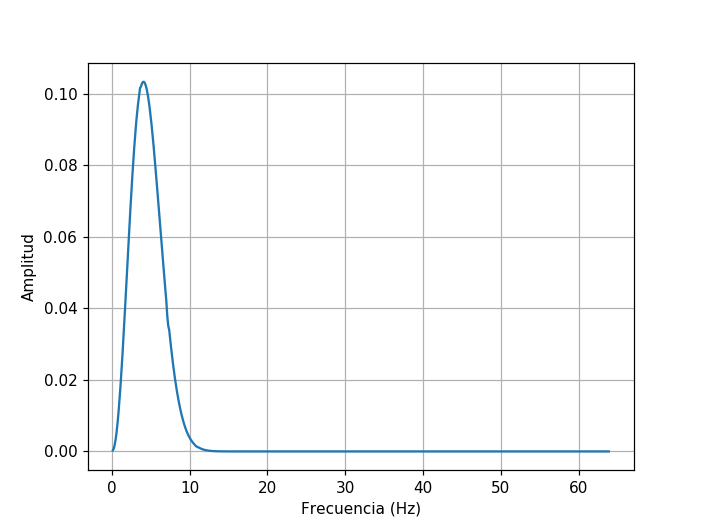

In [14]:
FS = 10.0
x , Samag , A , nfs = fou.Ftrans(Rick*T_t/N , N , T_t/N , FS)
fou.grafFourier(Samag , x , nfs , 10)

We can also perform inverse Fourier transform to get the time signal once again as follows:

<IPython.core.display.Javascript object>


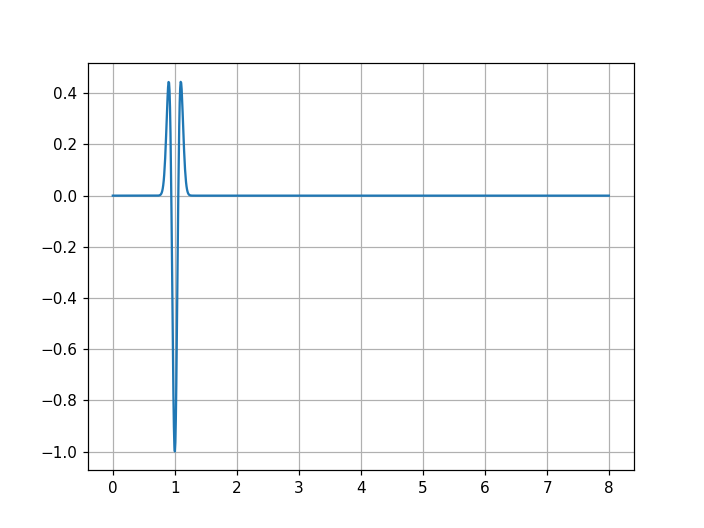

In [15]:
ZZ = np.fft.ifft(A*N/T_t)
ZZ = np.real(ZZ)
fou.grafsignalG(ZZ , T_t/N , 11)

Notice that although we prescribed a central frequency of $f_c = 1.0 Hz$ the selected sampling rate produced an spectral description up to $64.0 Hz$. The user is invited to use a larger sampling rate and se what is the effect upon the frequency description of the pulse.

## Example: A Seismic pulse

Consider now the following pulse resembling a typical seismic signal:

$$f(t) = {C_{6\pi t}}{e^{ - \pi {t^2}}}$$

The pulse (which is shown in the figure) has been discretized according to the following parameters:

<IPython.core.display.Javascript object>


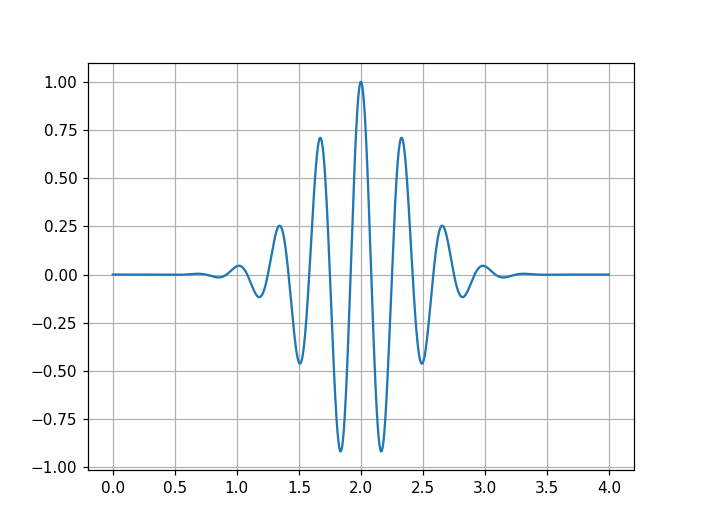

In [16]:
N   = 2048
T_t = 4.0
x = np.arange(-2.0 , 2.0 ,T_t/N)
nn = len(x)
FX = np.zeros((nn), dtype = complex)
xm = x 
pot = -np.pi*xm**2
FX = np.cos(6.0*np.pi*xm)*np.exp(pot)
fou.grafsignalG(FX , T_t/N , 12 )

The corresponding inverse Fourier transform produces the following amplitude spectra:

fourier.py:96: RuntimeWarning: invalid value encountered in sqrt
  Sas[i]=np.sqrt(suma/Nf)


<IPython.core.display.Javascript object>


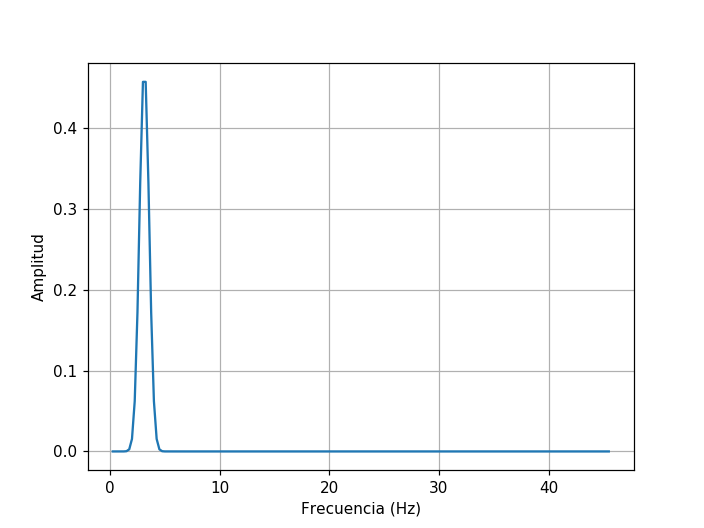

In [17]:
FS = 10.0
x , Samag , A , nfs = fou.Ftrans(FX*T_t/N , N , T_t/N , FS)
fou.grafFourier(Samag , x , nfs , 13)

Notice that in the computation of the Fourier transform the signal had to be scaled by the paramter $\Delta t.$

An interesting description of the Fourier representation of a function is available in the Youtube site: https://www.youtube.com/watch?v=spUNpyF58BY.

## Popagation of a plane wave
Consider a plane front of constant frquency $\omega$ (i.e., a ray) propagating in the $x-y$ space with propagation direction $\hat n = {S_\gamma }\hat i - {C_\gamma }\hat j$ (see Figure below). The propagation media, corresponds to a full-space and is characterized by its propagation velocity $c = \beta$ and its mass density $\rho$. In the figure the space is assumed infinite and the system of reference is located at an arbitrary point. Notice that the angle $\gamma$ indicating the direction of propagation is defined with respect to the vertical.

<center><img src="./img/plane.png" alt="plane.png" style="width:400px"></center>

The frequency domain representation (i.e., the Fourier transform) of the response at a point ${\vec x}$ due to the passage of the wave front is given by the (transfer) function:

$${F_i}(\hat i\omega ) = {d_i}{e^{\hat i\vec \kappa  \cdot \vec x}}$$

where $\vec \kappa  = \frac{\omega }{c}\hat n$ is the wave vector, while ${d_i}$ is a unit vector defining the polarization direction. In the case of $SH$ polarization $d$ is simply $1.0.$

If on the other hand, $R\left( {\hat i\omega } \right)$ is the Fourier spectra of a pulse, say a Ricker pulse, then the time domain response at ${\vec x}$ can be computed via:

$${u_i}(\vec x,t) = \frac{1}{{2\pi }}\int\limits_{ - \infty }^{ + \infty } {R\left( {\hat i\omega } \right)} F_i^*(\hat i\omega ){e^{ - \hat i\omega t}}d\omega.$$

In the above $F_i^*(\hat i\omega )$ is the complex conjugate of ${F_i}(\hat i\omega ).$


### Propagating pulse
Consider a Ricker pulse characterizd by the same parameters as defined previously and let us compute the response at a given point ${\vec x}.$ The location of the center of the pulse, defined by ${t_c}$ gives the response at the origin of the system of reference.

If we assume that the pulse starts to propagate from a distance $y = H$ it will arrive at the origin of the reference system at a time $t=H/c$. It means that the time signal must be assigned a duration long enough to allow the front to propagate along the whole domain.

For instance, assume that $\beta = 1.0$ and $H = 10.0$. It means that the front will appear at the origin approximately at $t = 8.0s$, so we will center it at $t = 9.0s$ and will also give   it a total duration of $T_t = 12.0$.

Let us assign values to the parameters and plot its time domain representation at the origin (i.e., after 8 seconds have passed).

<IPython.core.display.Javascript object>


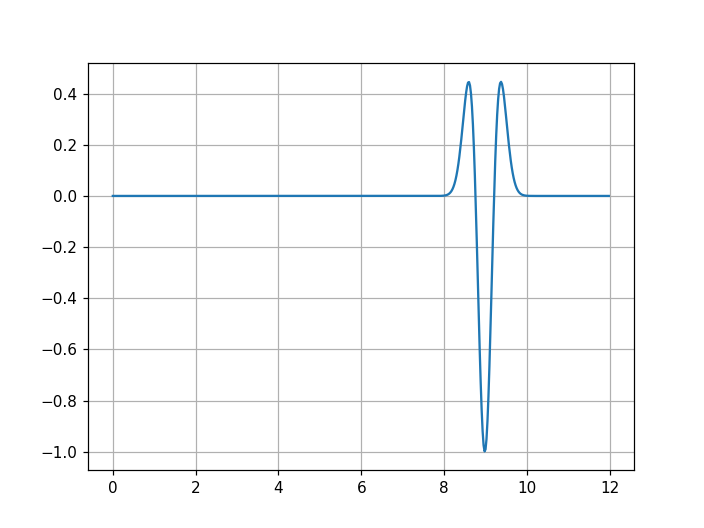

In [18]:
FS = 10.0
N  = 512 
T_t = 12.0
tc  = 9.0
fc  = 1.0
fm  = 4.0*fc
dt  = T_t/N
Rick , time = fou.ricker(N , T_t , tc, fc)
x , Sas , Saf , nfs = fou.Ftrans(Rick , N , dt , FS)
fou.grafsignalG(Rick , dt , 14)

### Transfer function
We can now find the Fourier representation of the response (or also the transfer function of the system) ${F_i}(\hat i\omega )$. After defining th parameters required for the Fourier analysis we have:

In [19]:
Nf =int((N - 1)/2)
df = 1.0/T_t
lif = df
lff = df*Nf
fre = np.linspace(lif, lff, Nf , dtype=float)

Assigning the angle of incidence $\gamma$, the propagation velocity $\beta$ and the coordinates of the response point ${\vec x}$

In [20]:
desplaz = np.zeros(Nf, dtype=complex)
Gamma = 0.0
Gamma = (Gamma*np.pi/180.0)
nx1 = np.sin(Gamma)
ny1 =-np.cos(Gamma)
Beta = 1.0
xcor = 0.0
ycor = 8.0

In [21]:
for l in range (0, Nf):
    kapa = 2.0*np.pi*fre[l]/Beta
    pha_ang_1  = -kapa*(nx1*xcor + ny1*ycor)
    desplaz[l] =  np.exp(1j*pha_ang_1)
    
TF = np.zeros(N , dtype=complex)
for i in range(Nf):
    TF[i+1 ] = desplaz[i]
    TF[-1-i] = np.conj(desplaz[i])

### Time domain response
Now we can conduct the convolution $R\left( {\hat i\omega } \right)F_i^*(\hat i\omega )$ and the final inverse Fourier transform to obtain the time domain response according to:


$${u_i}(\vec x,t) = \frac{1}{{2\pi }}\int\limits_{ - \infty }^{ + \infty } {R\left( {\hat i\omega } \right)} F_i^*(\hat i\omega ){e^{ - \hat i\omega t}}d\omega. $$

Notice the time-location of the pulse at the point $\vec x$ and compare it with its time location at the point $\vec x = 0.$


<IPython.core.display.Javascript object>


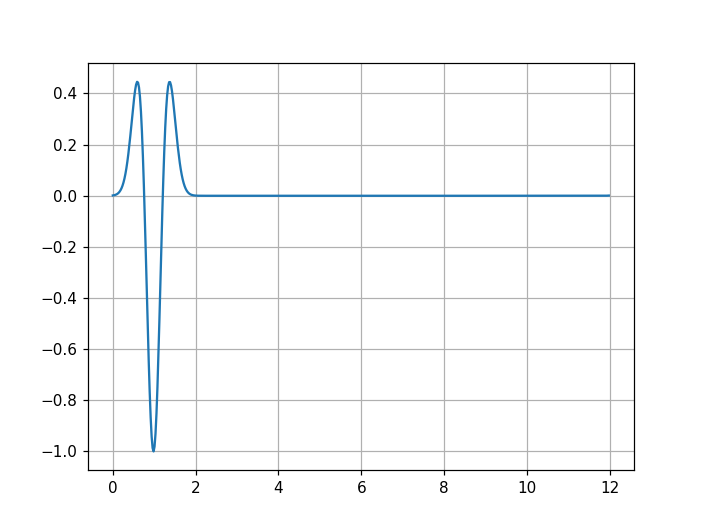

In [22]:
for i in range(N):
    TF[i] = Saf[i] * TF[i]
    
ZZ = np.fft.ifft(TF)
ZZ = np.real(ZZ)
fou.grafsignalG(ZZ , dt , 15)

### Response at multiple points

Now we will compute the response at various points defined by the coordinate arrays x[] and y[] respectively:

<IPython.core.display.Javascript object>


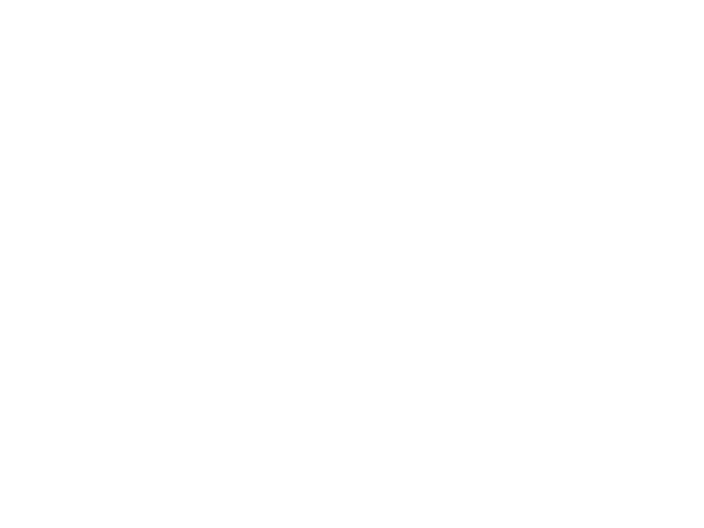

In [23]:
FS  = 10.0
N   = 512 
T_t = 12.0
tc  = 9.0
fc  = 1.0
fm  = 4.0*fc
dt  = T_t/N
Rick , time = fou.ricker(N , T_t , tc, fc)
x , Sas , Saf , nfs = fou.Ftrans(Rick , N , dt , FS)
#
xx =[0.0 , 0.0 , 0.0 , 0.0 ]
yy =[0.0 , 3.0 , 2.0 , 1.0]
#
for j in range(4):
    desplaz = np.zeros(Nf, dtype=complex)
    xcor = xx[j]
    ycor = yy[j]
    for l in range(Nf):
        kapa = 2.0*np.pi*fre[l]/Beta
        pha_ang_1  = -kapa*(nx1*xcor + ny1*ycor)
        desplaz[l] =  np.exp(1j*pha_ang_1)
        
    for i in range(Nf):
        TF[i+1 ] = desplaz[i]
        TF[-1-i] = np.conj(desplaz[i])
        
    for i in range(N):
        TF[i] = Saf[i] * TF[i]
    ZZ = np.fft.ifft(TF)
    ZZ = np.real(ZZ)
    fou.grafsignalG(ZZ , dt, 16)

### Two propagating rays

Now, let us add a second ray of direction dfined by $\hat n =  - {S_\theta }\hat i - {C_\theta }\hat j$ 

In [24]:
Theta = 0.0
Gamma = 15.0

In [25]:
FS  = 10.0
N   = 512 
T_t = 12.0
tc  = 9.0
fc  = 1.0
fm  = 4.0*fc
dt  = T_t/N
Rick , time = fou.ricker(N , T_t , tc, fc)
x , Sas , Saf , Nf = fou.Ftrans(Rick , N , dt , FS)
#
desplaz = np.zeros(Nf, dtype=complex)
Beta = 1.0
xcor = 3.0
ycor = 3.0
#
Theta = (Theta*np.pi/180.0)
Gamma = (Gamma*np.pi/180.0)
nx1 = np.sin(Theta)
ny1 =-np.cos(Theta)
nx2 =-np.sin(Gamma)
ny2 =-np.cos(Gamma)

In [26]:
for l in range (0, Nf):
    kapa = 2.0*np.pi*fre[l]/Beta
    pha_ang_1  = -kapa*(nx1*xcor + ny1*ycor)
    pha_ang_2  = -kapa*(nx2*xcor + ny2*ycor)
    desplaz[l] = np.exp(1j*pha_ang_1) + np.exp(1j*pha_ang_2)
    
TF = np.zeros(N , dtype=complex)
for i in range(Nf):
    TF[i+1 ] = desplaz[i]
    TF[-1-i] = np.conj(desplaz[i])

<IPython.core.display.Javascript object>


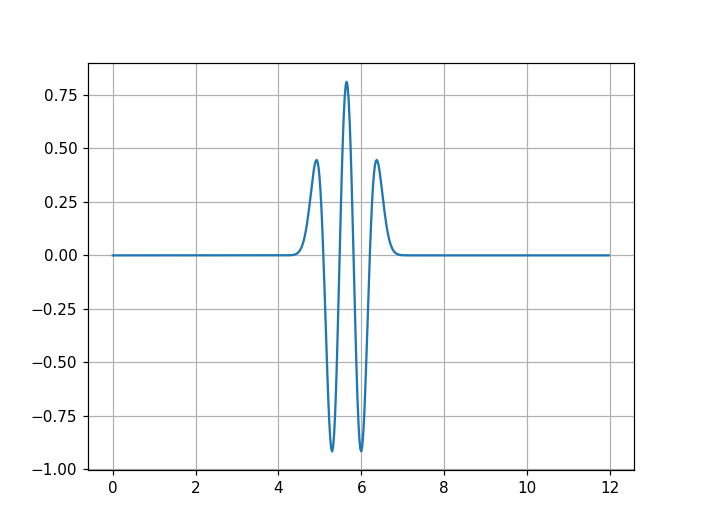

In [27]:
for i in range(N):
    TF[i] = Saf[i] * TF[i]
    
ZZ = np.zeros(N , dtype=complex)
ZZ = np.fft.ifft(TF)
ZZ = np.real(ZZ)
plt.clf()
fou.grafsignalG(ZZ , dt , 17)

and compute also the Fourier amplitude spectra of the response.

<IPython.core.display.Javascript object>


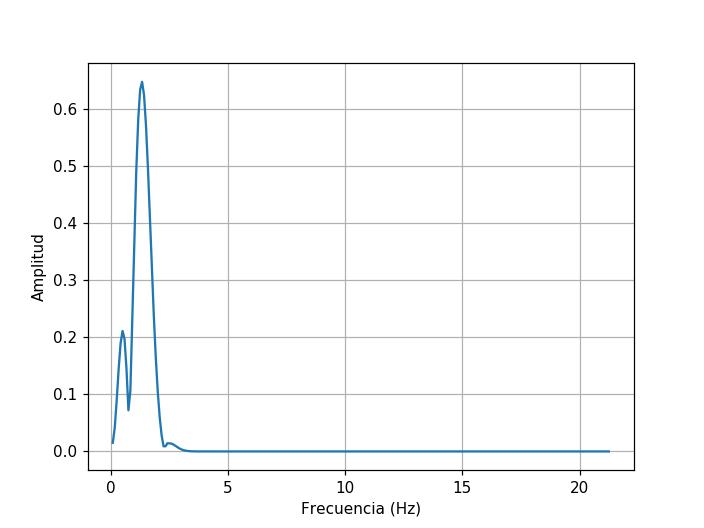

In [28]:
x , Sas_out , Saf , nfs = fou.Ftrans(ZZ , N , dt , FS)
fou.grafFourier(Sas_out*dt , x , Nf , 18)

Notice that the time domain response is now a distroted pulse, while its Fourier spectra has frequency information different than in the single pulse.

### Ratio between 2 Fourier spectra
Sometimes it is required to obtain the output/input ratio:

<IPython.core.display.Javascript object>


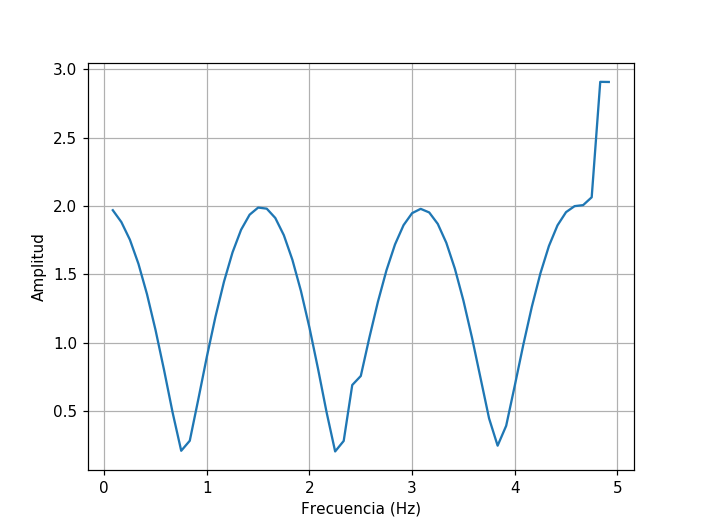

In [29]:
FT_out =Sas_out/Sas
fou.grafFourier(FT_out , x , Nf , 19)

## References

Advanced Engineering Mathematics. Michael D. Greenberg. Prentic Hall. Upper Saddle River, New Jersey. Second Edition, 1998.

Quantitative Seismology. Keiiti Aki and Paul G. Richards. University Scinc Books. Second Edition, 2009.

Wave Propagation in Elastic Solids. J.D. Achenbach. North-Holland series in Applied Mathematics and Mechanics, Volume 16. North-Holland Publishing Company, New York.

An algorithm for the machine calculation of complex Fourier series. Cooley, James W.; Tukey, John W. (1965). Mathematics of Computation. 19 (90): 297–301. ISSN 0025-5718.

In [30]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()